## Evaluación: Examen Parcial
- Curso: Inteligencia Artificial
- Profesor: Rosales Huamanchumo, Javier Ulises
- Alumno: Araujo Canales, Christian Jeaker
- Código: u202121225

## Problema 2 - Hoja de ejercicios - Algoritmo A Star

In [2]:
from graphviz import Digraph

# Clase Grafo Heurístico Bidireccional llamada BidHeuGraph
class BidHeuGraph:
  def __init__(self):
    self.adjacencies = {}
    self.heuristics = {}

  def add_node(self, node, heuristic=0):
    if node not in self.adjacencies:
      self.adjacencies[node] = []
      self.heuristics[node] = heuristic
    else:
      # Si el nodo ya existe, actualizar su valor heurístico
      self.heuristics[node] = heuristic

  def add_edge(self, source, destination, weight):
    if source not in self.adjacencies:
      raise ValueError(f"Source {source} does not exist")
    if destination not in self.adjacencies:
      raise ValueError(f"Destination {destination} does not exist")
        
    # Agregar la conexión del nodo source al nodo destination con su peso
    self.adjacencies[source].append((destination, weight))
        
    # Agregar la conexión del nodo destination al nodo source con el mismo peso
    self.adjacencies[destination].append((source, weight))
  
  def view(self):
    dot = Digraph(format='png')  # Puedes cambiar el formato según necesites
    for node in self.adjacencies:
      dot.node(node, label=f"{node}\nH:{self.heuristics[node]}")
    
    for source, edges in self.adjacencies.items():
      for destination, weight in edges:
        dot.edge(source, destination, label=str(weight))
    
    return dot  # Retorna el objeto Graphviz sin guardarlo

In [ ]:
import heapq

def a_star_search(graph, start, goal):
    """
    Implementación del algoritmo A* para encontrar el camino más corto entre dos nodos.
    
    Args:
        graph (Graph): El grafo en el que buscar
        start: Nodo inicial
        goal: Nodo objetivo
    
    Returns:
        tuple: (camino como lista de nodos, costo total del camino)
        Si no se encuentra un camino, devuelve (None, float('inf'))
    """
    # Conjunto de nodos visitados
    closed_set = set()
    
    # Conjunto de nodos por visitar (cola de prioridad)
    open_set = []
    
    # Para cada nodo, qué nodo nos llevó a él
    came_from = {}
    
    # Para cada nodo, el costo del camino más barato desde start hasta ese nodo
    g_score = {node: float('inf') for node in graph.adjacencies}
    g_score[start] = 0
    
    # Para cada nodo, el costo total estimado desde start hasta goal pasando por ese nodo
    f_score = {node: float('inf') for node in graph.adjacencies}
    f_score[start] = graph.heuristics[start]
    
    # Añadir el nodo inicial a la cola de prioridad
    heapq.heappush(open_set, (f_score[start], start))
    
    while open_set:
        # Obtener el nodo con menor f_score
        current_f, current = heapq.heappop(open_set)
        
        # Si hemos llegado al objetivo, reconstruir y devolver el camino
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, g_score[goal]
        
        # Marcar el nodo como visitado
        closed_set.add(current)
        
        # Revisar todos los vecinos
        for neighbor, weight in graph.adjacencies[current]:
            # Ignorar vecinos ya visitados
            if neighbor in closed_set:
                continue
            
            # Calcular g_score tentativo para este vecino
            tentative_g_score = g_score[current] + weight
            
            # Si ya tenemos un camino mejor a este vecino, ignorar
            if tentative_g_score >= g_score[neighbor]:
                continue
            
            # Este es el mejor camino hasta ahora, guardarlo
            came_from[neighbor] = current
            g_score[neighbor] = tentative_g_score
            f_score[neighbor] = g_score[neighbor] + graph.heuristics[neighbor]
            
            # Añadir vecino a la cola de prioridad si no está ya
            if neighbor not in [n for _, n in open_set]:
                heapq.heappush(open_set, (f_score[neighbor], neighbor))
    
    # Si llegamos aquí, no hay camino al objetivo
    return None, float('inf')

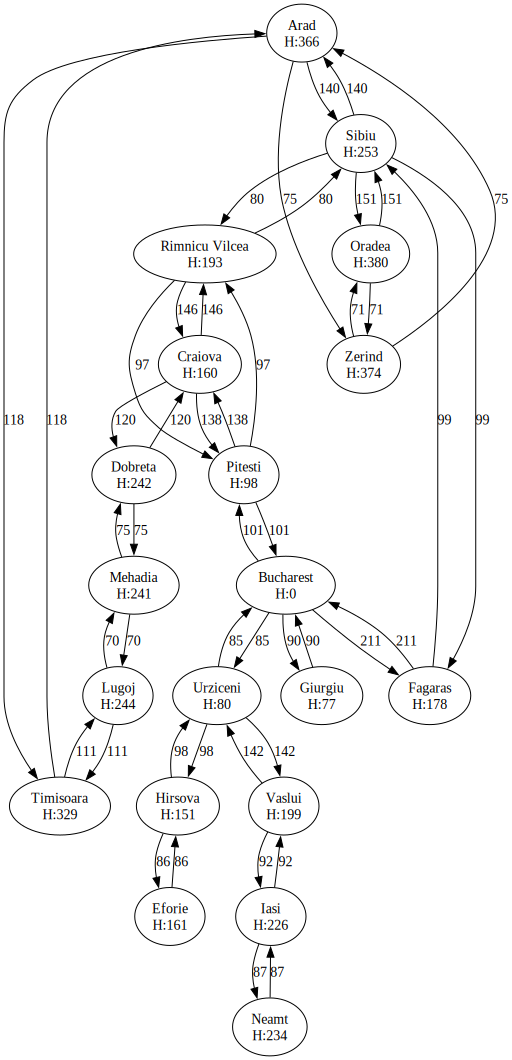

In [4]:
# Creamos el grafo
graph = BidHeuGraph()

# Agregar nodos y aristas al grafo
graph.add_node('Arad', 366)
graph.add_node('Bucharest', 0)
graph.add_node('Craiova', 160)
graph.add_node('Dobreta', 242)
graph.add_node('Eforie', 161)
graph.add_node('Fagaras', 178)
graph.add_node('Giurgiu', 77)
graph.add_node('Hirsova', 151)
graph.add_node('Iasi', 226)
graph.add_node('Lugoj', 244)
graph.add_node('Mehadia', 241)
graph.add_node('Neamt', 234)
graph.add_node('Oradea', 380) 
graph.add_node('Pitesti', 98)
graph.add_node('Rimnicu Vilcea', 193)
graph.add_node('Sibiu', 253)
graph.add_node('Timisoara', 329)
graph.add_node('Urziceni', 80)
graph.add_node('Vaslui', 199)
graph.add_node('Zerind', 374)

# Agregar las aristas
graph.add_edge('Oradea', 'Zerind', 71)
graph.add_edge('Zerind', 'Arad', 75)

graph.add_edge('Arad', 'Timisoara', 118)
graph.add_edge('Timisoara', 'Lugoj', 111)
graph.add_edge('Lugoj', 'Mehadia', 70)
graph.add_edge('Mehadia', 'Dobreta', 75)

graph.add_edge('Arad', 'Sibiu', 140)

graph.add_edge('Oradea', 'Sibiu', 151)

graph.add_edge('Sibiu', 'Rimnicu Vilcea', 80)
graph.add_edge('Rimnicu Vilcea', 'Craiova', 146)
graph.add_edge('Rimnicu Vilcea', 'Pitesti', 97)

graph.add_edge('Dobreta', 'Craiova', 120)
graph.add_edge('Craiova', 'Pitesti', 138)

graph.add_edge('Sibiu', 'Fagaras', 99)
graph.add_edge('Fagaras', 'Bucharest', 211)

graph.add_edge('Pitesti', 'Bucharest', 101)
graph.add_edge('Bucharest', 'Giurgiu', 90)

graph.add_edge('Bucharest', 'Urziceni', 85)

graph.add_edge('Urziceni', 'Hirsova', 98)
graph.add_edge('Hirsova', 'Eforie', 86)

graph.add_edge('Urziceni', 'Vaslui', 142)
graph.add_edge('Vaslui', 'Iasi', 92)
graph.add_edge('Iasi', 'Neamt', 87)

graph.view()

In [12]:
# Ejecutar el algoritmo A* para encontrar la ruta más corta desde 'Timisoara' hasta 'Bucharest'
start_node = 'Timisoara'
goal_node = 'Bucharest'
path, cost = a_star(graph, start_node, goal_node)
print(f"Ruta más corta desde {start_node} hasta {goal_node}: {path}")
print(f"Costo total: {cost}")

Ruta más corta desde Timisoara hasta Bucharest: ['Timisoara', 'Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Costo total: 536


## Problema 4 - Hoja de ejercicios - Algoritmo A Star

In [27]:
# Matriz inicial (solo con ceros)
tam = 10
matrix = [[0 for _ in range(tam)] for _ in range(tam)]

# Indices de las columnas
print("  ", end="")
for i in range(len(matrix)):
    print(f"{i}", end=" ")
print("")
# Contenido de la matriz
for i in range(len(matrix)):
    print(f"{i}", end=" ")
    for j in range(len(matrix[0])):
        print(f"{matrix[i][j]}", end=" ")
    print("")

  0 1 2 3 4 5 6 7 8 9 
0 0 0 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 0 0 0 0 0 
2 0 0 0 0 0 0 0 0 0 0 
3 0 0 0 0 0 0 0 0 0 0 
4 0 0 0 0 0 0 0 0 0 0 
5 0 0 0 0 0 0 0 0 0 0 
6 0 0 0 0 0 0 0 0 0 0 
7 0 0 0 0 0 0 0 0 0 0 
8 0 0 0 0 0 0 0 0 0 0 
9 0 0 0 0 0 0 0 0 0 0 


In [ ]:
# Costo de movimiento
